# Lesson - Statistics and Probability IV: Visualizing Frequency Distribution

To find patterns in a frequency table we have to look up the frequency of each unique value or class interval and at the same time compare the frequencies. This process can get time consuming for tables with many unique values or class intervals, or when the frequency values are large and hard to compare against each other.

We can solve this problem by visualizing the data in the tables with the help of graphs. Graphs make it much easier to scan and compare frequencies, providing us with a single picture of the entire distribution of a variable.

we'll plot frequency distributions in three kinds of graphs:

- Bar plots.
- Pie charts.
- Histograms.

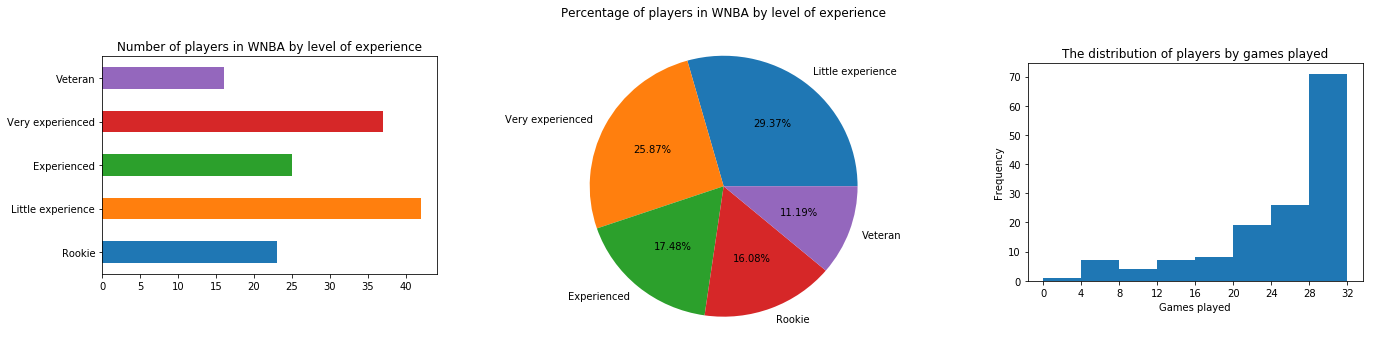

## Bar Plots

For variables measured on a **nominal** or an **ordinal scale**, it's common to use a bar plot to visualize their distribution. To generate a bar plot for the distribution of a variable we need two sets of values:
- One set containing the unique values.
- Another set containing the frequency for each unique value.

We can get this data easily from a frequency table. We can use Series.value_counts() to generate the table, and then use the Series.plot.bar() [method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.bar.html) on the resulting table to generate a bar plot. Using the **WNBA dataset**

For the players' position "Pos" variable, we can plot the bar graph as under:

In [1]:
import pandas as pd
# Setting pandas display options for large data
pd.options.display.max_rows = 200
pd.options.display.max_columns = 50
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
wnba = pd.read_csv("wnba.csv")

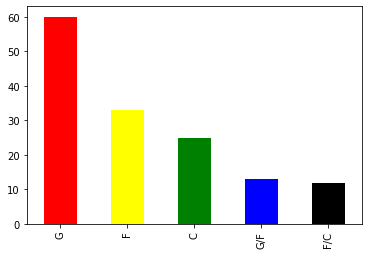

In [3]:
wnba['Pos'].value_counts().plot.bar(color = ['red', 'yellow', 'green','blue', 'black'])

The Series.plot.bar() method generates a vertical bar plot with the frequencies on the y-axis, and the unique values on the x-axis. To generate a horizontal bar plot, we can use the Series.plot.barh() [method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.barh.html):

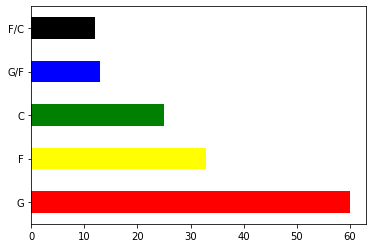

In [4]:
wnba['Pos'].value_counts().plot.barh(color = ['red', 'yellow', 'green','blue', 'black'])

### Exercise

Create a new column in wnba dataframe  and created a new column named `Exp_ordinal`, which is measured on an ordinal scale. The new column should have five unique labels, and each one corresponds to a number of years a player has played in WNBA:

```
Years in WNBA	Label
        0	Rookie
        1-3	Little experience
        4-5	Experienced
        5-10 Very experienced
        gt10	Veteran 
```        

Create a bar plot to display the distribution of the Exp_ordinal variable:

- Generate a frequency table for the Exp_ordinal variable.
- Sort the table by unique labels in an ascending order.
- Generate a bar plot using the Series.plot.bar() method.
     


object
int32
Little Experience    42
Very experienced     37
Experienced          25
Rookie               23
Veteran              16
Name: Exp_ordinal, dtype: int64


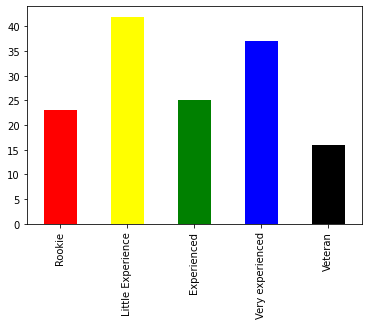

In [5]:

def make_exp_ordinal(row):
    """ A function to create additional column in dataframe based on players' experience"""
    if row['Experience'] == 0:
        return 'Rookie'
    elif 0 < row['Experience'] <= 3:
        return 'Little Experience'
    elif 3 < row['Experience'] <=  5:
        return 'Experienced'
    elif 5 < row['Experience'] <= 10:
        return 'Very experienced'
    elif row['Experience'] >  10:
        return 'Veteran'
    



# check data type of "Experience" column

print(wnba.Experience.dtype)

# Convert data type of "Experience" column to int: first, replace "R" with 0 to indicated a rookie

wnba["Experience"] = wnba.Experience.str.replace("R", "0")
wnba["Experience"] = wnba.Experience.astype(int)
print(wnba.Experience.dtype)

# Apply the function
wnba["Exp_ordinal"] = wnba.apply(make_exp_ordinal, axis=1)

# Calculate frequency table 
print(wnba.Exp_ordinal.value_counts())
# Plot a bar graph while sorting the index. Note: ordinal index will be sorted alphbetically with sort_index
# We have to sort_index either using iloc in series or by category names
wnba.Exp_ordinal.value_counts().iloc[[3, 0, 2, 1, 4]]. plot.bar(color = ['red', 'yellow', 'green','blue', 'black'])

### Bar Plots (labels rotated)
One of the problems with the bar plot we built above is that the tick labels of the x-axis are hard to read. To fix this we can rotate the labels, or we can switch to a horizontal bar plot. We can rotate the labels using the rot parameter of Series.plot.bar() method. The labels are already rotated at 90°, and we can tilt them a bit at 45°:

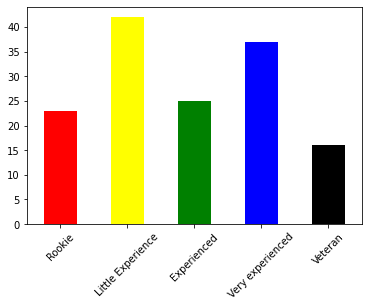

In [6]:
wnba.Exp_ordinal.value_counts().iloc[[3, 0, 2, 1, 4]]. plot.bar(rot = 45, color = ['red', 'yellow', 'green','blue', 'black'])

## Horizontal Bar Plots
We can do a better job with a horizontal bar plot using the use the `Series.plot.barh()` [method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.barh.html). We also have to give a title to the plot, if we want to publish it. 

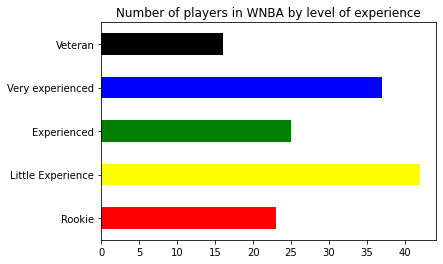

In [7]:
wnba.Exp_ordinal.value_counts().iloc[[3, 0, 2, 1, 4]].plot.barh(title = "Number of players in WNBA by level of experience", color = ['red', 'yellow', 'green','blue', 'black'])

## Pie Charts
Another kind of graph we can use to visualize the distribution of nominal and ordinal variables is a pie chart.

Just as the name suggests, a pie chart is structured pretty much like a regular pie: it takes the form of a circle and is divided in wedges. Each wedge in a pie chart represents a category (one of the unique labels), and the size of each wedge is given by the proportion (or percentage) of that category in the distribution.

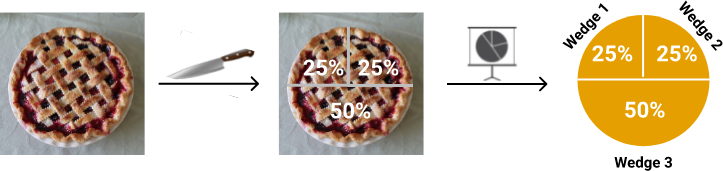

We can generate pie charts using the `Series.plot.pie()` [method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.pie.html). This is how we'd do that for the `Pos` variable. Note the use of keyword arguments figsize and colormap from the Pandas [`Dataframe.plot`] object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot)

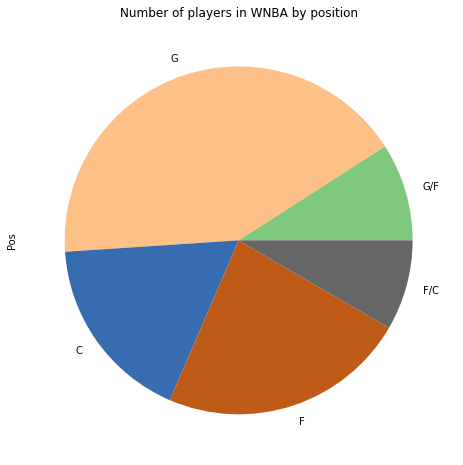

In [8]:
wnba.Pos.value_counts().iloc[[3, 0, 2, 1, 4]].plot.pie(title = "Number of players in WNBA by position", figsize = (10,8), colormap = "Accent")

The main advantage of pie charts over bar plots is that they provide a much better sense for the relative frequencies (proportions and percentages) in the distribution. Looking at a bar plot, we can see that categories are more or less numerous than others, but it's really hard to tell what proportion in the distribution each category takes.

With pie charts, we can immediately get a visual sense for the proportion each category takes in a distribution. Just by eyeballing the pie chart above we can make a series of observations in terms of proportions:

- Guards ("G") take about two fifths (2/5) of the distribution.
- Forwards ("F") make up roughly a quarter (1/4) of the distribution.
- Close to one fifth (1/5) of the distribution is made of centers ("C").
- Combined positions ("G/F" and "F/C") together make up roughly one fifth (1/5) of the distribution.

Below we generate a pie chart to visualize the distribution of the `Exp_ordinal` variable.

Generate a frequency table for the `Exp_ordinal` variable without sorting the table (not needed for plotting charts).
Use the `Series.plot.pie()` method to generate the pie plot.

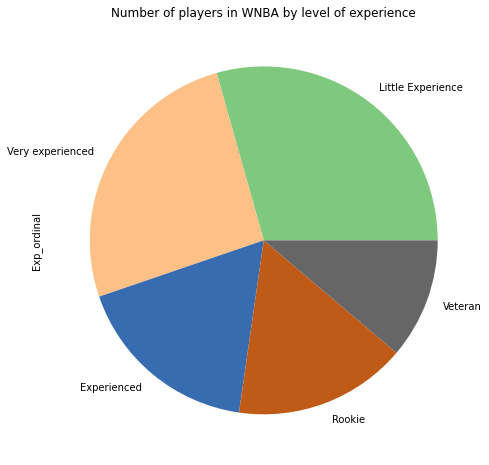

In [9]:
wnba.Exp_ordinal.value_counts().plot.pie(title = "Number of players in WNBA by level of experience", figsize = (10,8), colormap = "Accent")

### Customizing a Pie Chart

The pie chart we generated above is somewhat elliptical rather than a circle, and the Exp_ordinal label is unaesthetic and hard to read.

To give a pie chart the right shape, we need to specify equal values for height and width in the `figsize` parameter of Series.plot.pie(). The `Exp_ordinal` is the label of a hidden y-axis, which means we can use the `plt.ylabel()` [function](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.ylabel.html) to remove it. This is how we can do this for the `Pos` variable:

Text(0, 0.5, '')

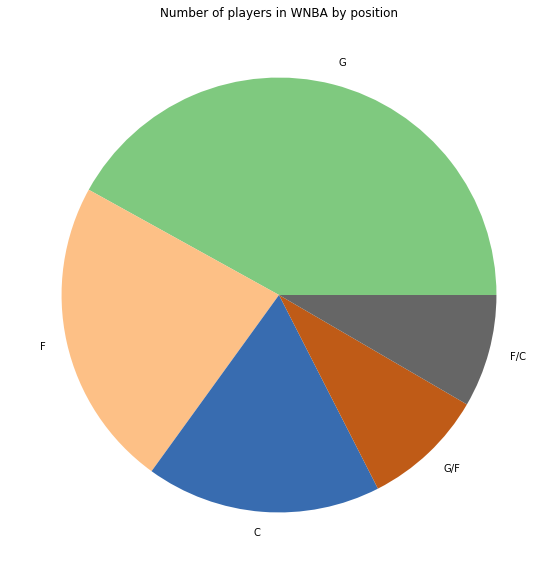

In [13]:
wnba.Pos.value_counts().plot.pie(title = "Number of players in WNBA by position", figsize = (10,10), colormap = "Accent")
plt.ylabel('')


We can use the `autopct` [parameter](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.pie.html) to get %ages displayed in each segment of the pie chart and use the string '%.1f%%' to have percentages displayed with a precision of one decimal place. The percentages will be automatically determined under the hood, which means we don't have to transform to percentages ourselves using `Series.value_counts(normalize = True) * 100`.
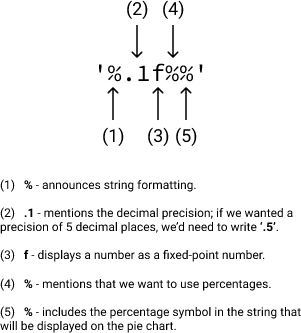

Text(0, 0.5, '')

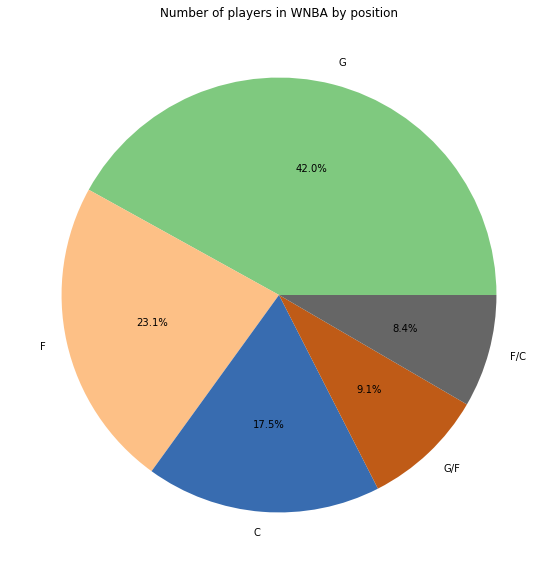

In [14]:
wnba.Pos.value_counts().plot.pie(title = "Number of players in WNBA by position", figsize = (10,10), colormap = "Accent", autopct = '%.1f%%')
plt.ylabel('')


Below, we generate and customize a pie chart to visualize the distribution of the `Exp_ordinal` variable.

We will generate a frequency table for the `Exp_ordinal` variable without sorting (not needed for charts).
- Use the `Series.plot.pie()` method to generate the pie plot.

- Use the `figsize` parameter to specify a width and a height of 6 inches each.
- Use the `autopct` parameter to have percentages displayed with a precision of 2 decimal places.
- Add the following `title` to the plot: Percentage of players in WNBA by level of experience.
- Remove the `Exp_ordinal` label.

Note: We are using default colors instead of the colormap = "Accent"

Text(0, 0.5, '')

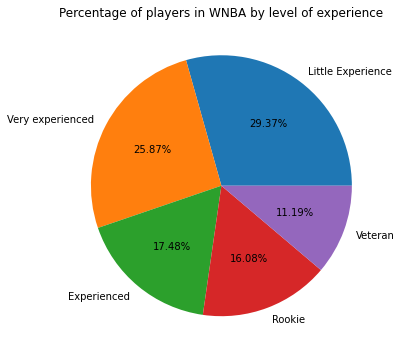

In [15]:
wnba.Exp_ordinal.value_counts().plot.pie(title = "Percentage of players in WNBA by level of experience", figsize = (6,6), autopct = '%.2f%%')
plt.ylabel('')

## Histograms
Because of the special properties of variables measured on interval and ratio scales, we can describe distributions in more elaborate ways. Let's examine the PTS (total points) variable, which is discrete and measured on a ratio scale:

In [16]:
print(wnba['PTS'].describe())

count    143.000000
mean     201.790210
std      153.381548
min        2.000000
25%       75.000000
50%      177.000000
75%      277.500000
max      584.000000
Name: PTS, dtype: float64


We can see that 75% of the values are distributed within a relatively narrow interval (between 2 and 277), while the remaining 25% are distributed in an interval that's slightly larger.

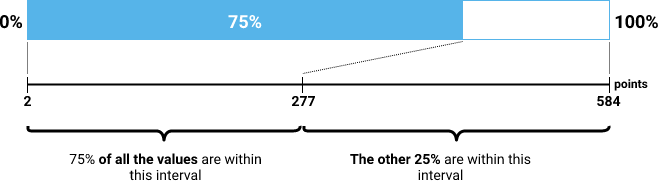

To visualize the distribution of the PTS variable, we need to use a graph that allows us to see immediately the patterns outlined above. The most commonly used graph for this scenario is the **histogram**.

To generate a histogram for the `PTS` variable, we can use the` Series.plot.hist()` [method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.hist.html) directly on the wnba['PTS'] column (we don't have to generate a frequency table in this case, it is automatically generated with binning within the method, default: bins = 10):

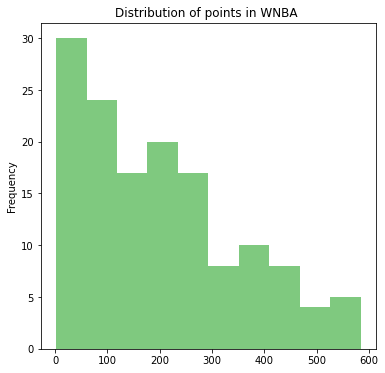

In [18]:
wnba.PTS.plot.hist(title = "Distribution of points in WNBA ", figsize = (6,6), colormap = "Accent")

### Statistics behind Histograms

Under the hood, the wnba['PTS'].plot.hist() method:

- Generated a grouped frequency distribution table for the PTS variable with ten class intervals.
- For each class interval it plotted a bar with a height corresponding to the frequency of the interval.
- Let's examine the grouped frequency distribution table of the PTS variable:

In [19]:
print(wnba['PTS'].value_counts(bins = 10).sort_index())

(1.417, 60.2]     30
(60.2, 118.4]     24
(118.4, 176.6]    17
(176.6, 234.8]    20
(234.8, 293.0]    17
(293.0, 351.2]     8
(351.2, 409.4]    10
(409.4, 467.6]     8
(467.6, 525.8]     4
(525.8, 584.0]     5
Name: PTS, dtype: int64


Each bar in the histogram corresponds to one class interval. To show this is true, we'll generate below the same histogram as in the previous screen, but this time:

- We'll add the values of the x-ticks manually using the xticks parameter.
- The values will be the limits of each class interval.
- We use the `arange(start, stop, step)` [function](https://numpy.org/doc/stable/reference/generated/numpy.arange.html?highlight=arange#numpy.arange) which returns evenly spaced values within a given interval, from numpy to generate the values and avoid spending time with typing all the values ourselves.
- We start at 2, not at 1.417, because this is the actual minimum value of the first class interval (we discussed about this in more detail in the previous mission).
- We'll add a grid line using the grid parameter to demarcate clearly each bar.
- We'll rotate the tick labels of the x-axis using the rot parameter for better readability

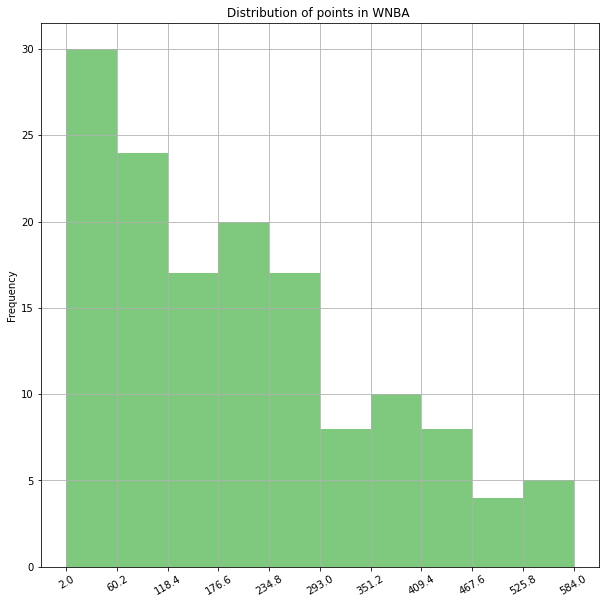

In [25]:
from numpy import arange
wnba.PTS.plot.hist(title = "Distribution of points in WNBA by number of players", figsize = (10,10), colormap = "Accent", grid = True, rot = 30, xticks = arange(2, 585, 58.2))

Looking on the histogram above, we can extract the same information as from the grouped frequency table. We can see that there are 20 players in the interval (176.6, 234.8], 10 players in the interval (351.2, 409.4], etc

We can also see the patterns we wanted to see when we examined the output of `wnba['PTS'].describe()`

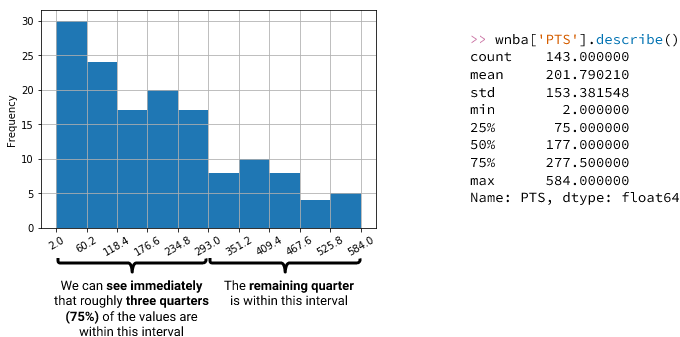



From the output of `wnba['PTS'].describe()` we can see that most of the values (75%) are distributed within a relatively narrow interval (between 2 and 277). This tells us that:

- The values are distributed unevenly across the 2 - 584 range (2 is the minimum value in the PTS variable, and 584 is the maximum).
- Most values are clustered in the first (left) part of the the distribution's range.

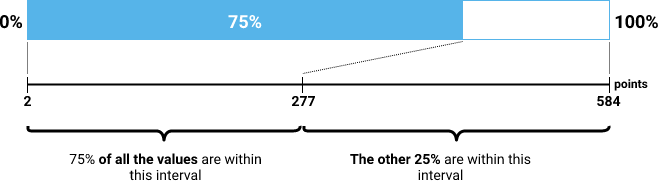

We can immediately see the same two patterns on the histogram above:

- The distribution of values is uneven, with each class interval having a different frequency. If the distribution was even, all the class intervals would have the same frequency.
- Most values (roughly three quarters) are clustered in the left half of the histogram.
- While it's easy and fast to make good estimates simply by looking at a histogram, it's always a good idea to add precision to our estimates using the percentile values we get from `Series.describe()`.

Below, We will examine the distribution of the `Games Played` variable using the `Series.describe()` [method](. Just from the output of this method, we will predict how the histogram of the Games Played variable should look like.

Once we have a good idea of what histogram shape to expect, we will plot a histogram for the `Games Played` variable using `Series.plot.hist()`

In [26]:
print(wnba['Games Played'].describe())

count    143.000000
mean      24.356643
std        7.104259
min        2.000000
25%       22.000000
50%       27.000000
75%       29.000000
max       32.000000
Name: Games Played, dtype: float64


In [28]:
print(wnba["Games Played"].value_counts(bins = 10).sort_index())

(1.969, 5.0]     5
(5.0, 8.0]       4
(8.0, 11.0]      3
(11.0, 14.0]     5
(14.0, 17.0]     6
(17.0, 20.0]     8
(20.0, 23.0]    15
(23.0, 26.0]    18
(26.0, 29.0]    48
(29.0, 32.0]    31
Name: Games Played, dtype: int64


Text(0.5, 0, 'Games Played')

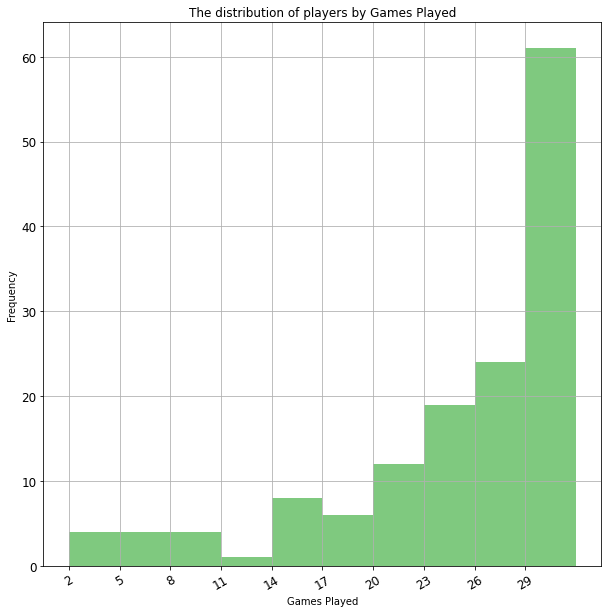

In [46]:
wnba["Games Played"].plot.hist(title = "The distribution of players by Games Played", figsize = (10,10), colormap = "Accent", grid = True, rot = 30, xticks = arange(2,32, 3), fontsize = 12)
plt.xlabel("Games Played")

### Histogrms as Modified Bar Plots
A histogram is basically the visual form of a grouped frequency table. Structurally, a histogram can also be understood as a modified version of a bar plot. The main difference is that in the case of a histogram there are no gaps between bars, and each bar represents an interval, not a single value.

The main reason we remove the gaps between bars in case of a histogram is that we want to show that the class intervals we plot are adjacent to one another. With the exception of the last interval, the ending point of an interval is the starting point of the next interval, and we want that to be seen on the graph.
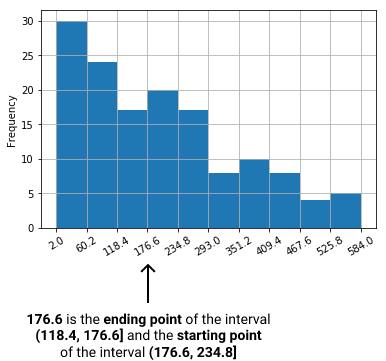

For bar plots we add gaps because in most cases we don't know whether the unique values of ordinal variables are adjacent to one another in the same way as two class intervals are. It's safer to assume that the values are not adjacent, and add gaps.

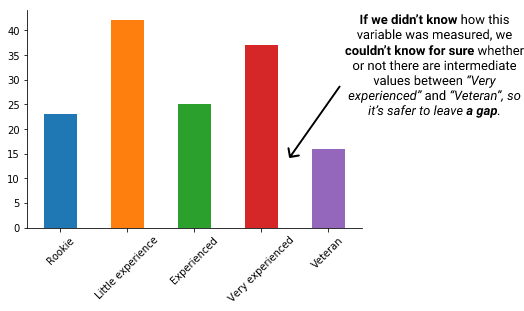

For nominal variables, values can't be numerically adjacent in principle, and we add gaps to emphasize that the values are fundamentally distinct.
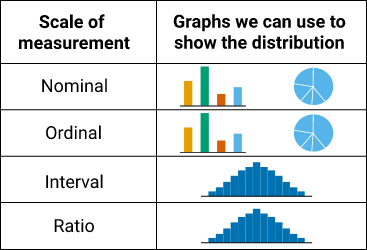

### Binning for Histograms
`Series.plot.hist()` splits a distribution by default into 10 class intervals. In general, 10 is a good number of class intervals to choose for frequency distribution tables because it offers a good balance between information and comprehensibility.
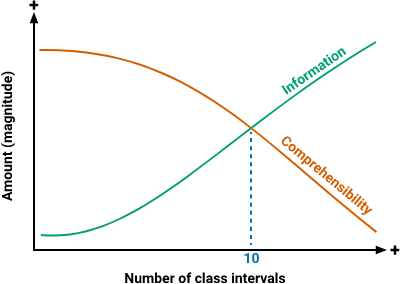

With histograms, the breakdown point is generally larger than 10 because visualizing a picture is much easier than reading a grouped frequency table. However, once the number of class intervals goes over 30 or so, the granularity increases so much that for some intervals the frequency will be zero. This will result in a discontinued histogram from which is hard to discern patterns.

Below, we can see how the histogram of the PTS variable changes as we vary the number of class intervals.
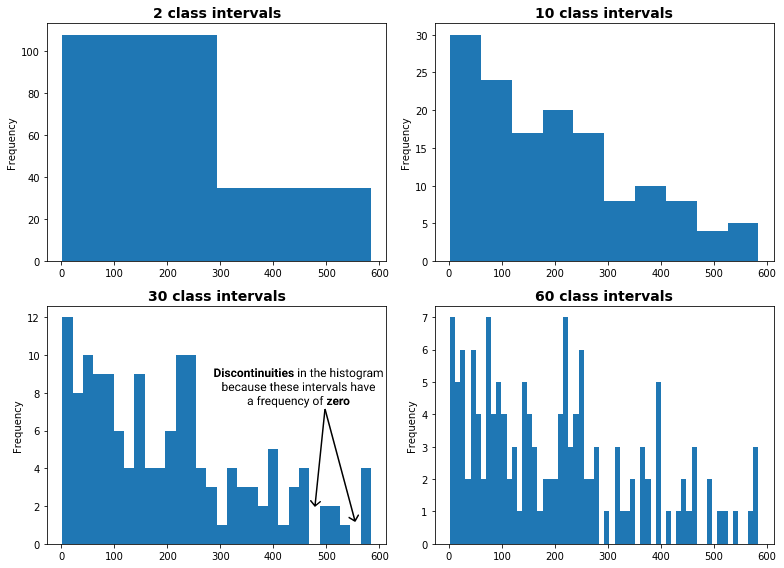

To modify the number of class intervals used for a histogram, we can use the `bins` parameter of `Series.plot.hist()`. A bin is the same thing as a class interval, and, when it comes to histograms, the term "bin" is used much more often.

Also, we'll often want to avoid letting pandas work out the intervals, and use instead intervals that we think make more sense. We can do this in two steps:

- We start with specifying the range of the entire distribution using the `range` [parameter](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html?highlight=hist#matplotlib.pyplot.hist) of `Series.plot.hist()`.
Then we combine that with the number of bins to get the intervals we want.

Let's say we want to get these three intervals for the distribution of the PTS variable:

$[1, 200)
[200, 400)
[400, 600]$
If the histogram ranges from 1 to 600, and we specify that we want three bins, then the bins will automatically take the intervals above. This is because the bins must have equal interval lengths, and, at the same time, cover together the entire range between 1 and 600. To cover a range of 600 with three bins, we need each bin to cover 200 points, with the first bin starting at 1, and the last bin ending at 600.

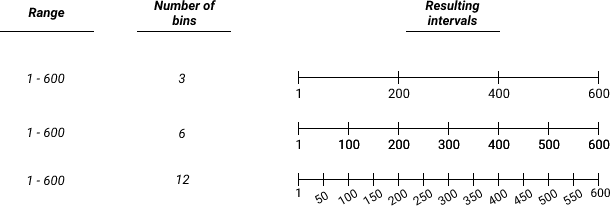

This is how we can generate a histogram with three bins and a 1 - 600 range for the PTS variable:

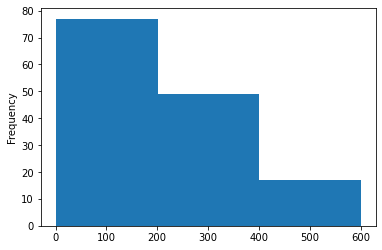

In [40]:
wnba['PTS'].plot.hist(range = (1,600), bins = 3)

If we change the range, and change to six bins, then we'll get these six intervals: [1, 100), [100, 200), [200, 300), [300, 400), [400, 500), [500, 600].

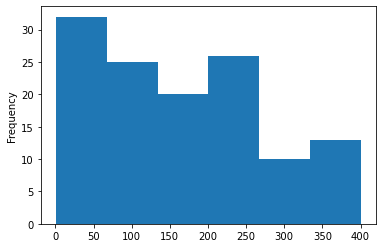

In [42]:
wnba['PTS'].plot.hist(range = (1,400), bins = 6)

Below, we will generate a histogram for the `Games Played` variable, and customize it in the following way:

- Each bin must cover an interval of 4 games. The first bin must start at 1, the last bin must end at 32.
- Add the title "The distribution of players by games played".
- Add a label to the x-axis named "Games played".

Text(0.5, 0, 'Games Played')

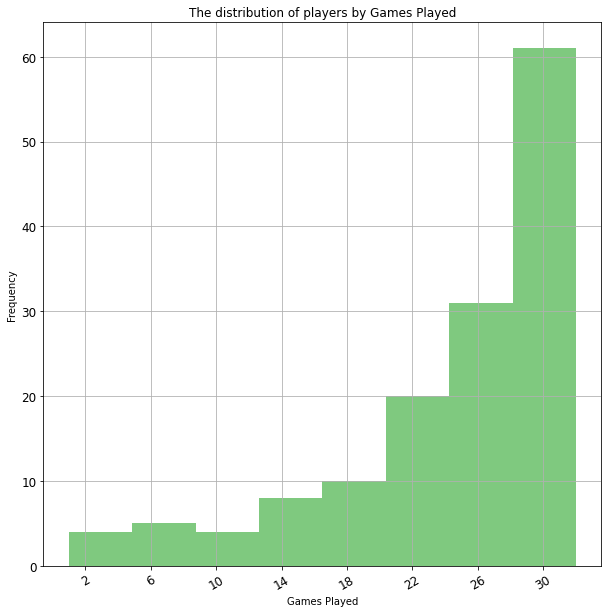

In [45]:
wnba["Games Played"].plot.hist(title = "The distribution of players by Games Played", figsize = (10,10), colormap = "Accent", grid = True, rot = 30, xticks = arange(2,32, 4), fontsize = 12, range = (1,32), bins = 8)
plt.xlabel("Games Played")

## Skewed Distributions

There are a couple of histogram shapes that appear often in practice. Consider the below given shapes of `Games Played` and `PTS`:
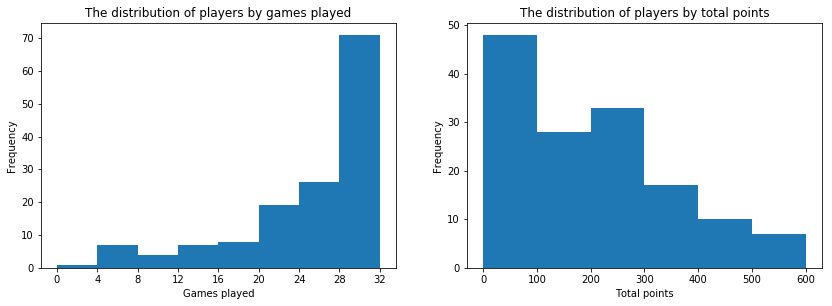

In the histogram on the left, we can see that:

- Most values pile up toward the endpoint of the range (32 games played).
- There are less and less values toward the opposite end (0 games played).

On the right histogram, we can see that:

- Most values pile up toward the starting point of the range (0 points).
- There are less and less values toward the opposite end.



- Both these histograms show skewed distributions. In a skewed distribution:
    - The values pile up toward the end or the starting point of the range, making up the body of the distribution.
    - Then the values decrease in frequency toward the opposite end, forming the tail of the distribution.
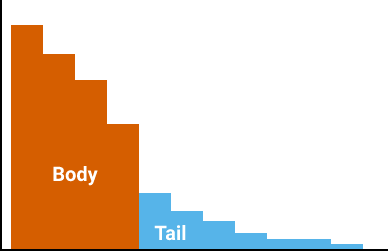


If the tail points to the left, then the distribution is said to be **left skewed**. When it points to the left, the tail points at the same time in the direction of negative numbers, and for this reason the distribution is sometimes also called **negatively skewed**.

If the tail points to the right, then the distribution is **right skewed**. The distribution is sometimes also said to be **positively skewed** because the tail points in the direction of positive numbers.

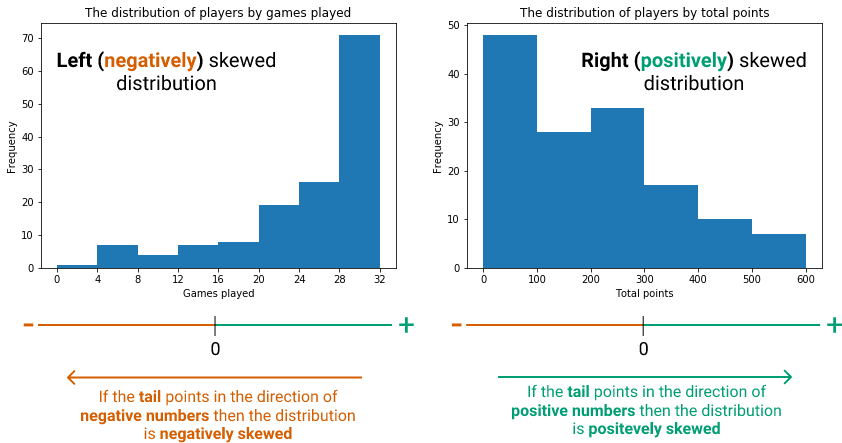

Below, we examine the distribution of the following two variables:

`AST` (number of assists).
`FT%` (percentage of free throws made out of all attempts).
Depending on the shape of the distribution, we will determine how the distributions are skewed. 
assists_distro for the AST column.
ft_percent_distro for the FT% column.
For instance, if you think the AST variable has a right skewed distribution, your answer should be assists_distro = 'right skewed'

Text(0.5, 0, 'Number of Assists')

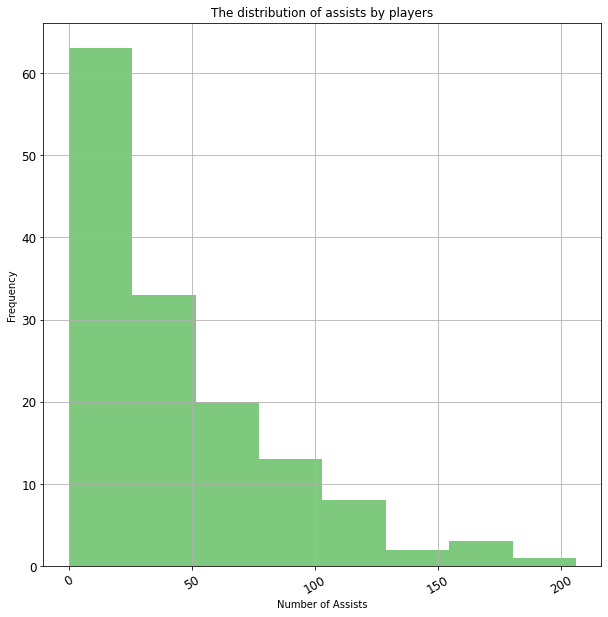

In [50]:
wnba["AST"].plot.hist(title = "The distribution of assists by players", figsize = (10,10), colormap = "Accent", grid = True, rot = 30,  fontsize = 12, bins = 8)
plt.xlabel("Number of Assists")

The above distribution is **right skewed** or **positively skewed**

Text(0.5, 0, 'Percent of Free Throws')

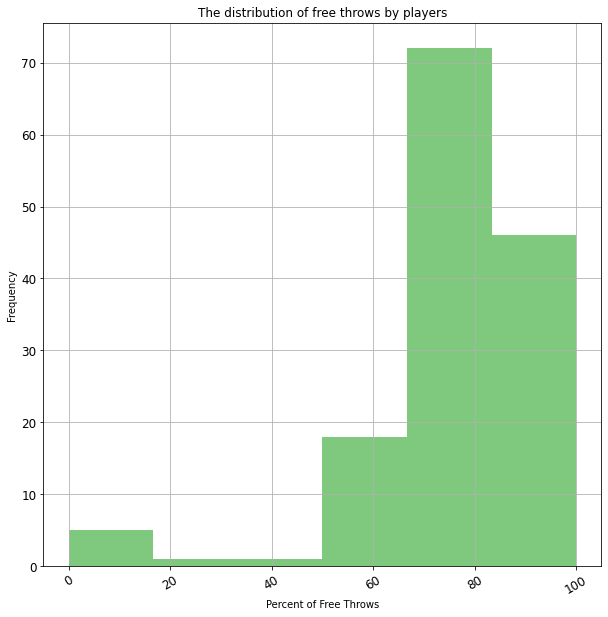

In [53]:
wnba["FT%"].plot.hist(title = "The distribution of free throws by players", figsize = (10,10), colormap = "Accent", grid = True, rot = 30,  fontsize = 12, bins = 6)
plt.xlabel("Percent of Free Throws")

In [ ]:
The above distribution is **left skewed** or **negatively skewed**

## Symmetrical Distributions

Besides skewed distributions, we often see histograms with a shape that is more or less symmetrical. If we draw a vertical line exactly in the middle of a symmetrical histogram, then we'll divide the histogram in two halves that are mirror images of one another.
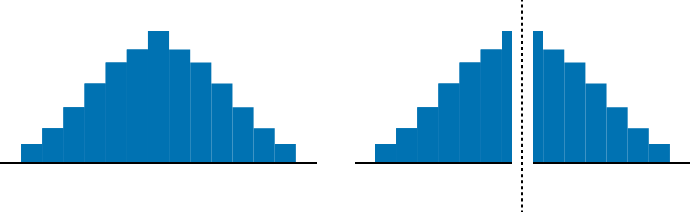

If the shape of the histogram is symmetrical, then we say that we have a symmetrical distribution.

### Normal Distribution
A very common symmetrical distribution is one where the values pile up in the middle and gradually decrease in frequency toward both ends of the histogram. This pattern is specific to what we call a normal distribution (also called Gaussian distribution).

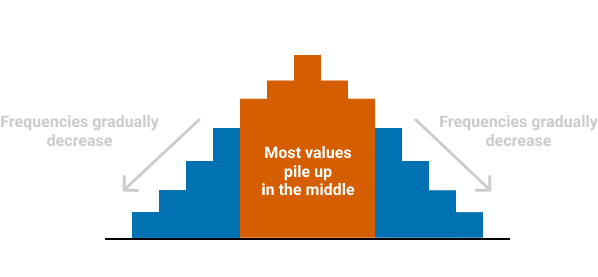

### Uniform Distribution

Another common symmetrical distribution is one where the values are distributed uniformly across the entire range. This pattern is specific to a uniform distribution.
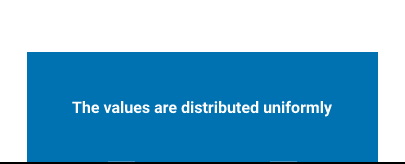

In practice, we rarely see perfectly symmetrical distributions. However, it's common to use perfectly symmetrical distributions as baselines for describing the distributions we see in practice. For instance, we'd describe the distribution of the `Weight` variable as resembling closely a normal distribution:

Text(0.5, 0, 'Weight')

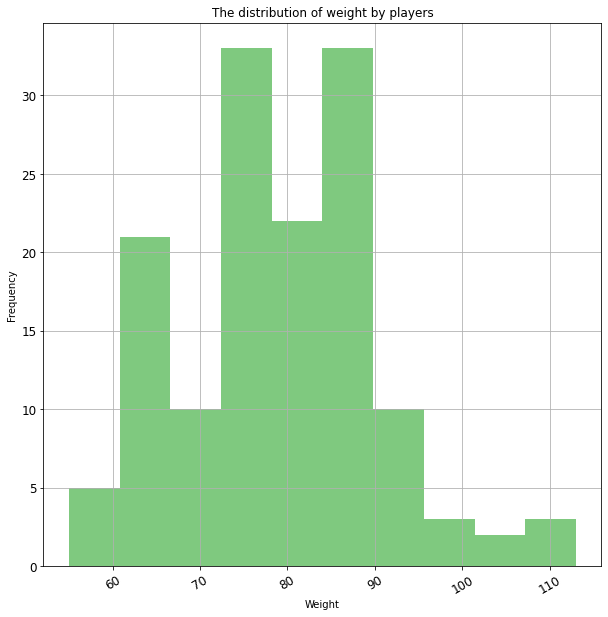

In [57]:
wnba["Weight"].plot.hist(title = "The distribution of weight by players", figsize = (10,10), colormap = "Accent", grid = True, rot = 30,  fontsize = 12, bins = 10)
plt.xlabel("Weight")

When we say that the distribution above resembles closely a normal distribution, we mean that most values pile up somewhere close to the middle and decrease in frequency more or less gradually toward both ends of the histogram.

A similar reasoning applies to skewed distributions. We don't see very often clear-cut skewed distributions, and we use the left and right skewed distributions as baselines for comparison. For instance, we'd say that the distribution of the `BMI `variable is slightly right skewed:

Text(0.5, 0, 'BMI')

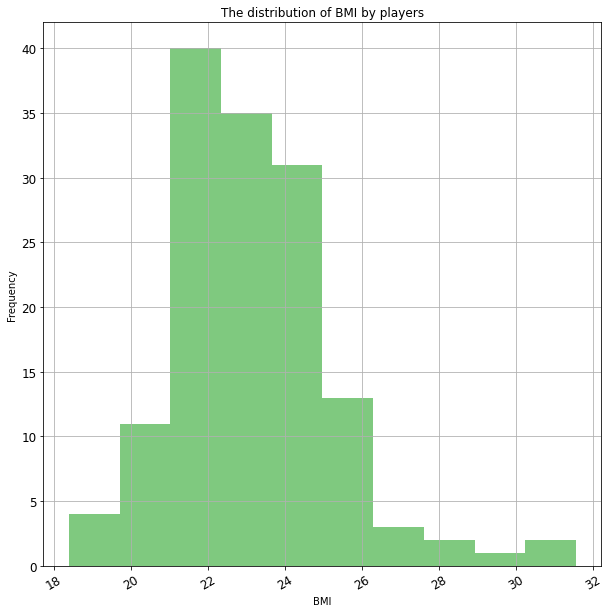

In [58]:
wnba["BMI"].plot.hist(title = "The distribution of BMI by players", figsize = (10,10), colormap = "Accent", grid = True, rot = 30,  fontsize = 12, bins = 10)
plt.xlabel("BMI")

Below, we will examine the distribution of the following variables, trying to determine which one resembles the most a normal distribution:

- `Age`
- `Height`
- `MIN`
Assign to the variable normal_distribution the name of the variable (as a string) whose distribution resembles the most a normal one.

For instance, if you think the MIN variable is the correct answer, then your answer should be normal_distribution = 'MIN'.

Text(0.5, 0, 'Age')

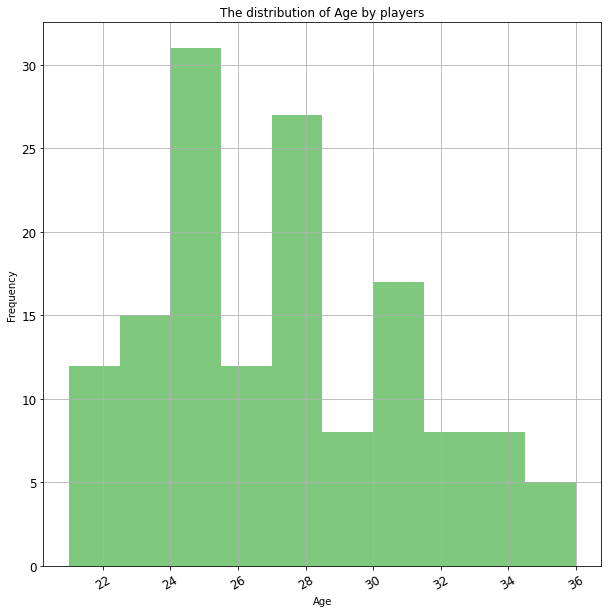

In [59]:
wnba["Age"].plot.hist(title = "The distribution of Age by players", figsize = (10,10), colormap = "Accent", grid = True, rot = 30,  fontsize = 12, bins = 10)
plt.xlabel("Age")

Text(0.5, 0, 'Height')

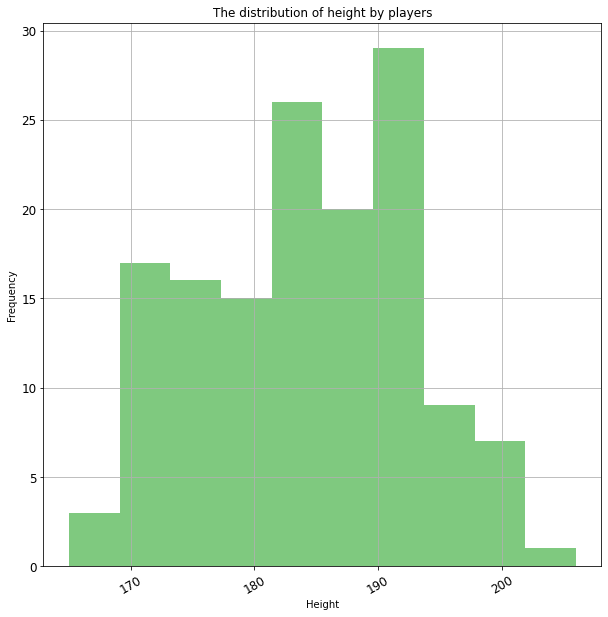

In [60]:
wnba["Height"].plot.hist(title = "The distribution of height by players", figsize = (10,10), colormap = "Accent", grid = True, rot = 30,  fontsize = 12, bins = 10)
plt.xlabel("Height")

Text(0.5, 0, 'Minutes Played')

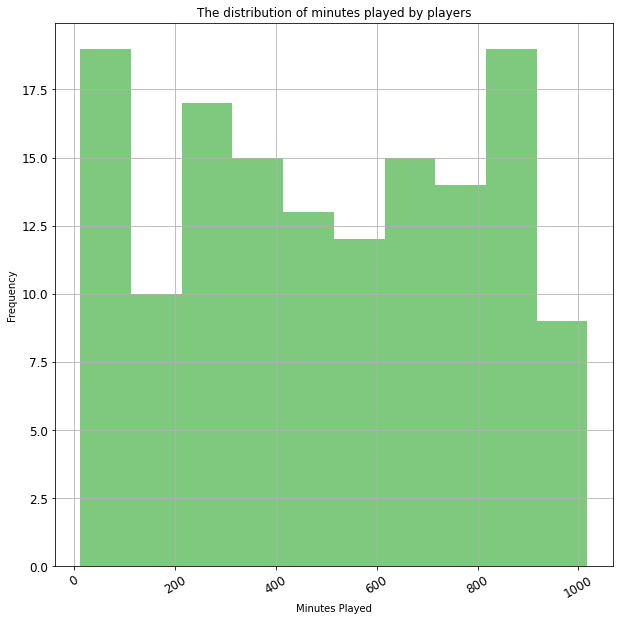

In [61]:
wnba["MIN"].plot.hist(title = "The distribution of minutes played by players", figsize = (10,10), colormap = "Accent", grid = True, rot = 30,  fontsize = 12, bins = 10)
plt.xlabel("Minutes Played")

Of the above distributions, the `Age` resembles right skewed distribution, `Height` resembles normal  distribution, and `Min` resembles uniform distribution. 

## Summary
If a variable is measured on a nominal or ordinal scale, we can use a bar plot or a pie chart. If the variable is measured on an interval or ratio scale, then a histogram is good choice.
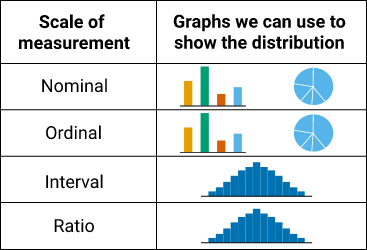

As a reminder, we are following the workflow given below
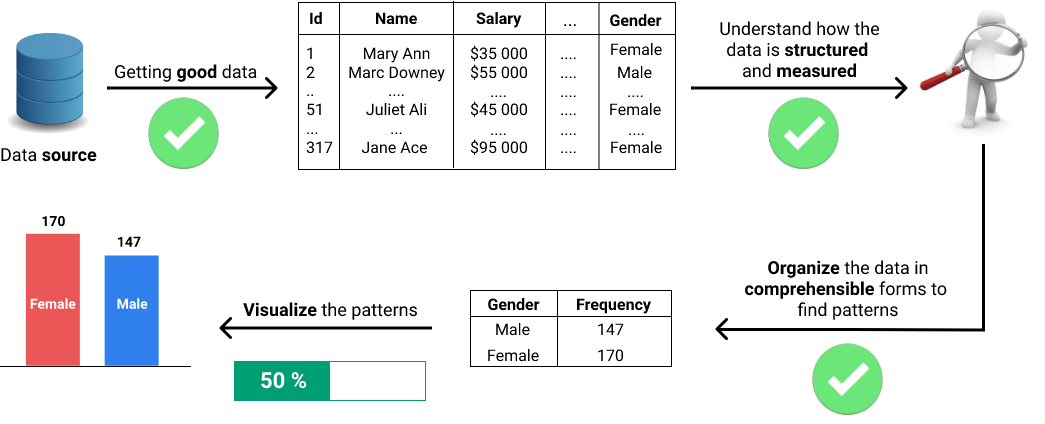